#### Imagine you working as a sale manager now you need to predict the Revenueand whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm (RF,Adaboost,Gradient Boost,Xgboost)


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report   
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
df = pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q4\online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
###changing the datatype

df['Weekend'] = df['Weekend'].astype('str')
df['Revenue'] = df['Revenue'].astype('str')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


C:\Users\pc\AppData\Local\Temp\ipykernel_22620\2997553590.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

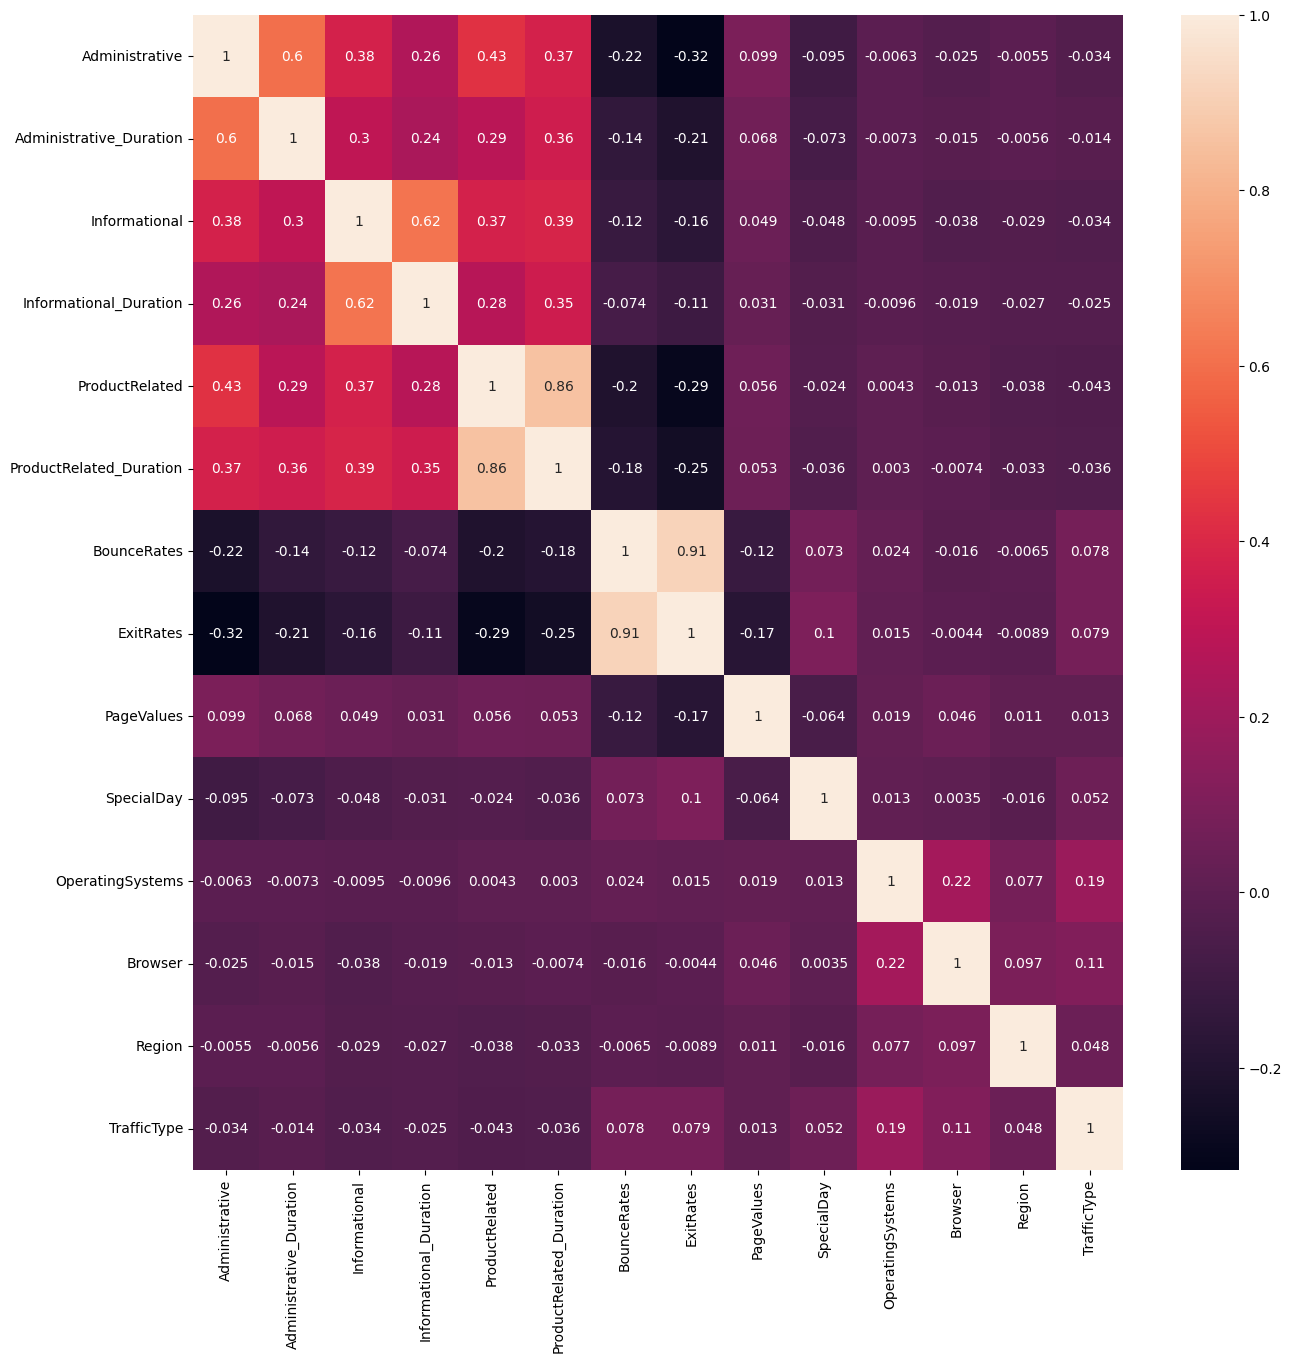

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)



In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [11]:
df_num = df[num_col]
df_cat = df[cat_col]

In [12]:
df_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [13]:
df_cat

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False
...,...,...,...,...
12325,Dec,Returning_Visitor,True,False
12326,Nov,Returning_Visitor,True,False
12327,Nov,Returning_Visitor,True,False
12328,Nov,Returning_Visitor,False,False


C:\Users\pc\AppData\Local\Temp\ipykernel_22620\3863816763.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_col[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_22620\3863816763.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_col[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel

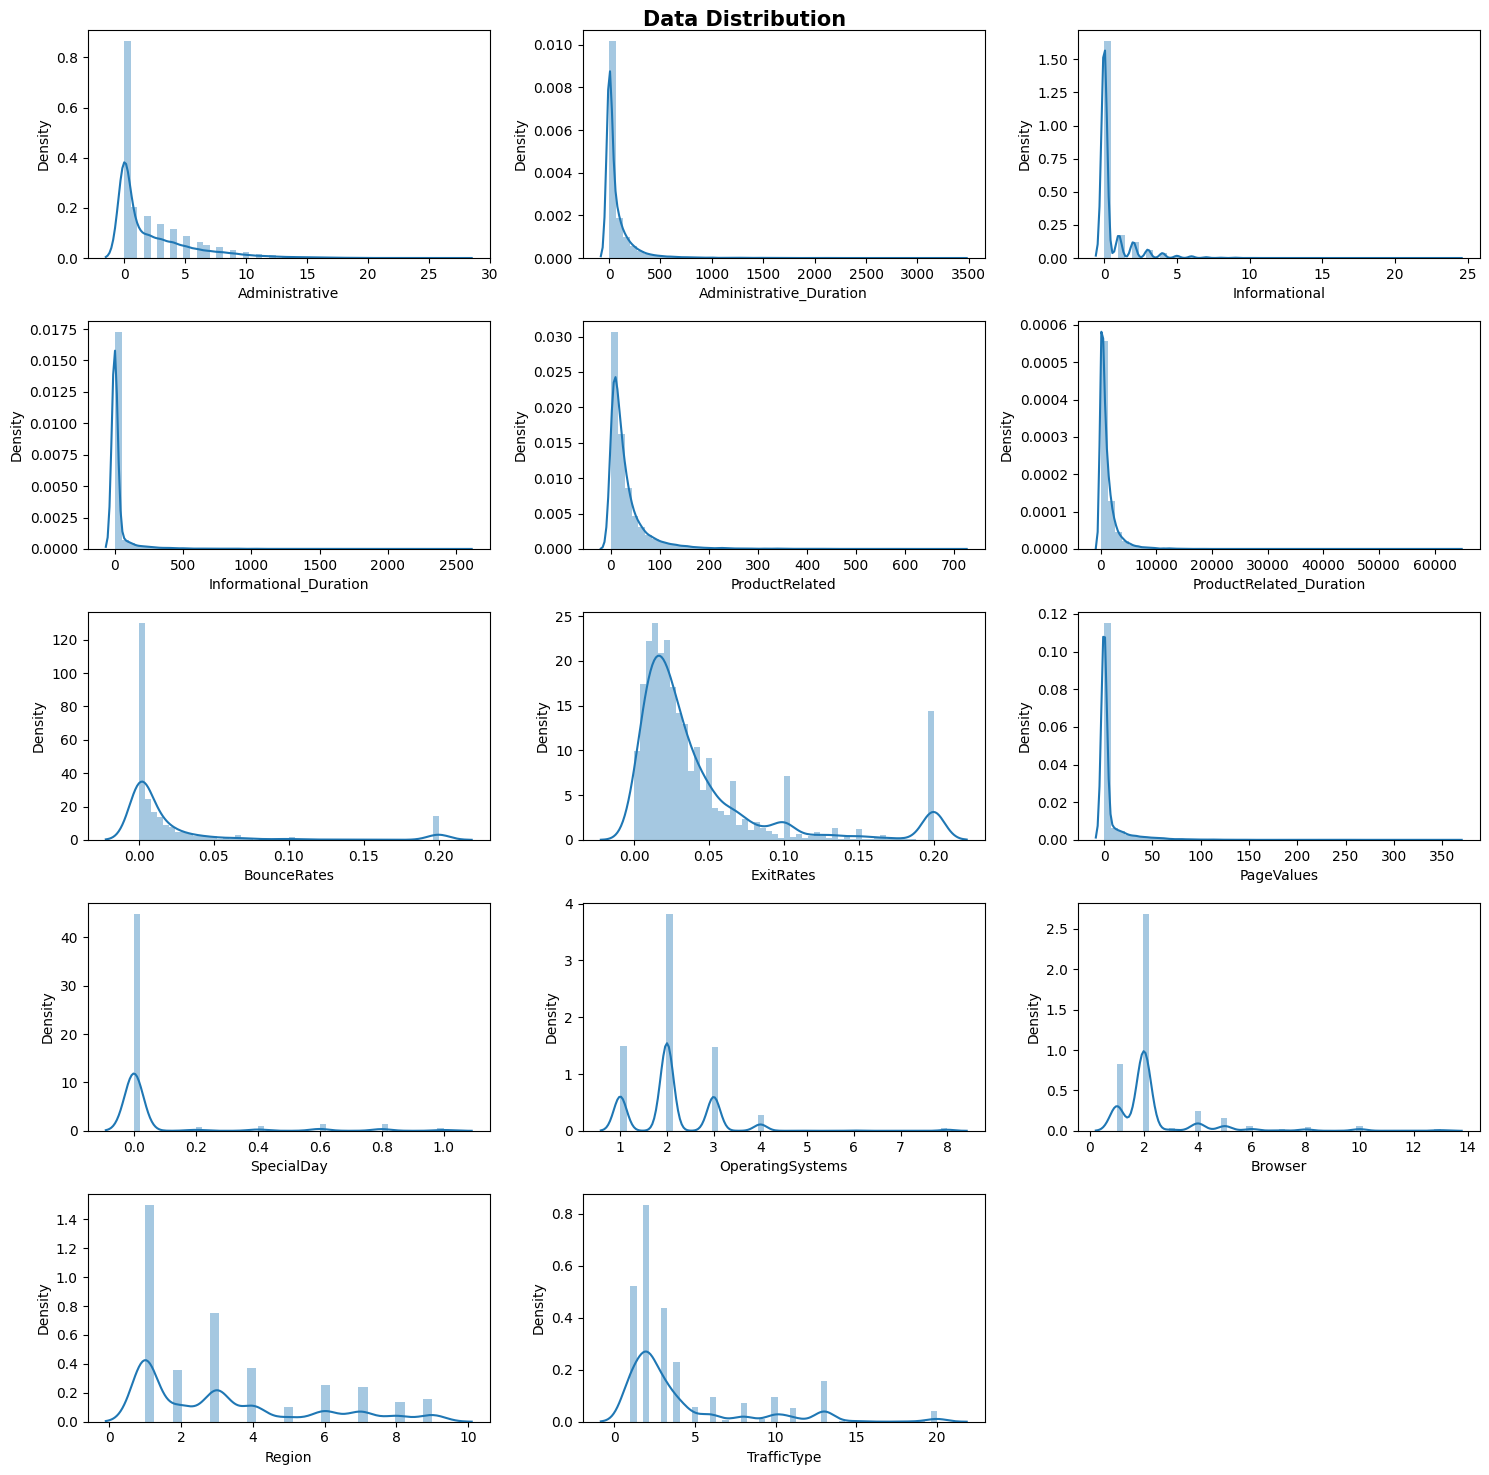

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution', fontsize=15, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

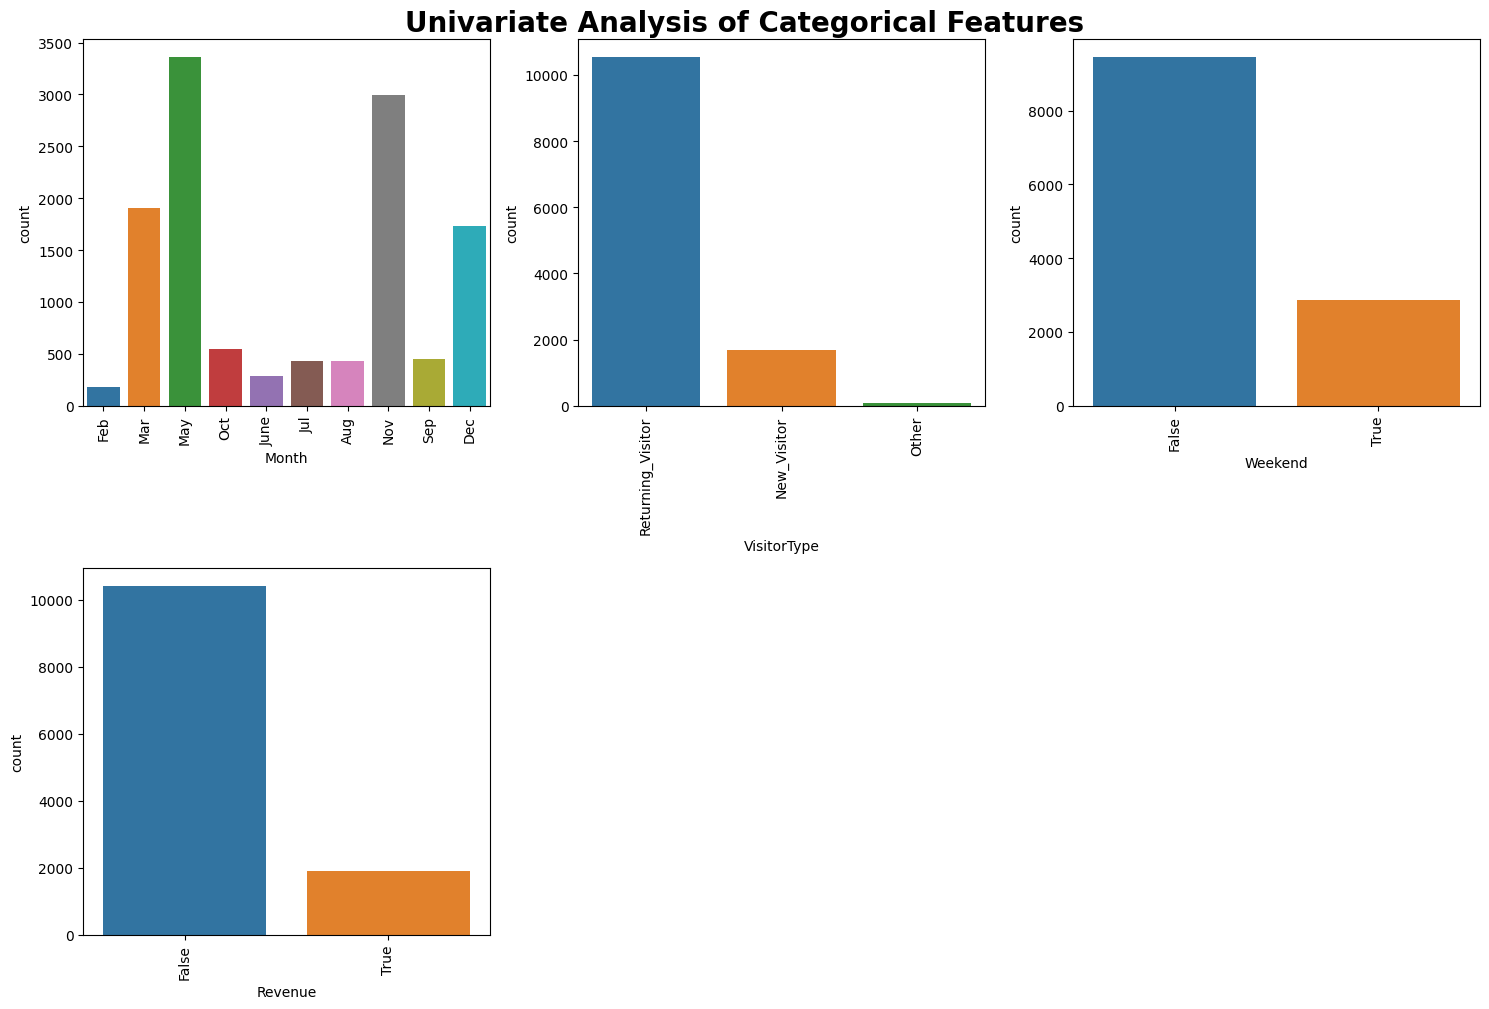

In [15]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cat_col[i]],data = df)
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

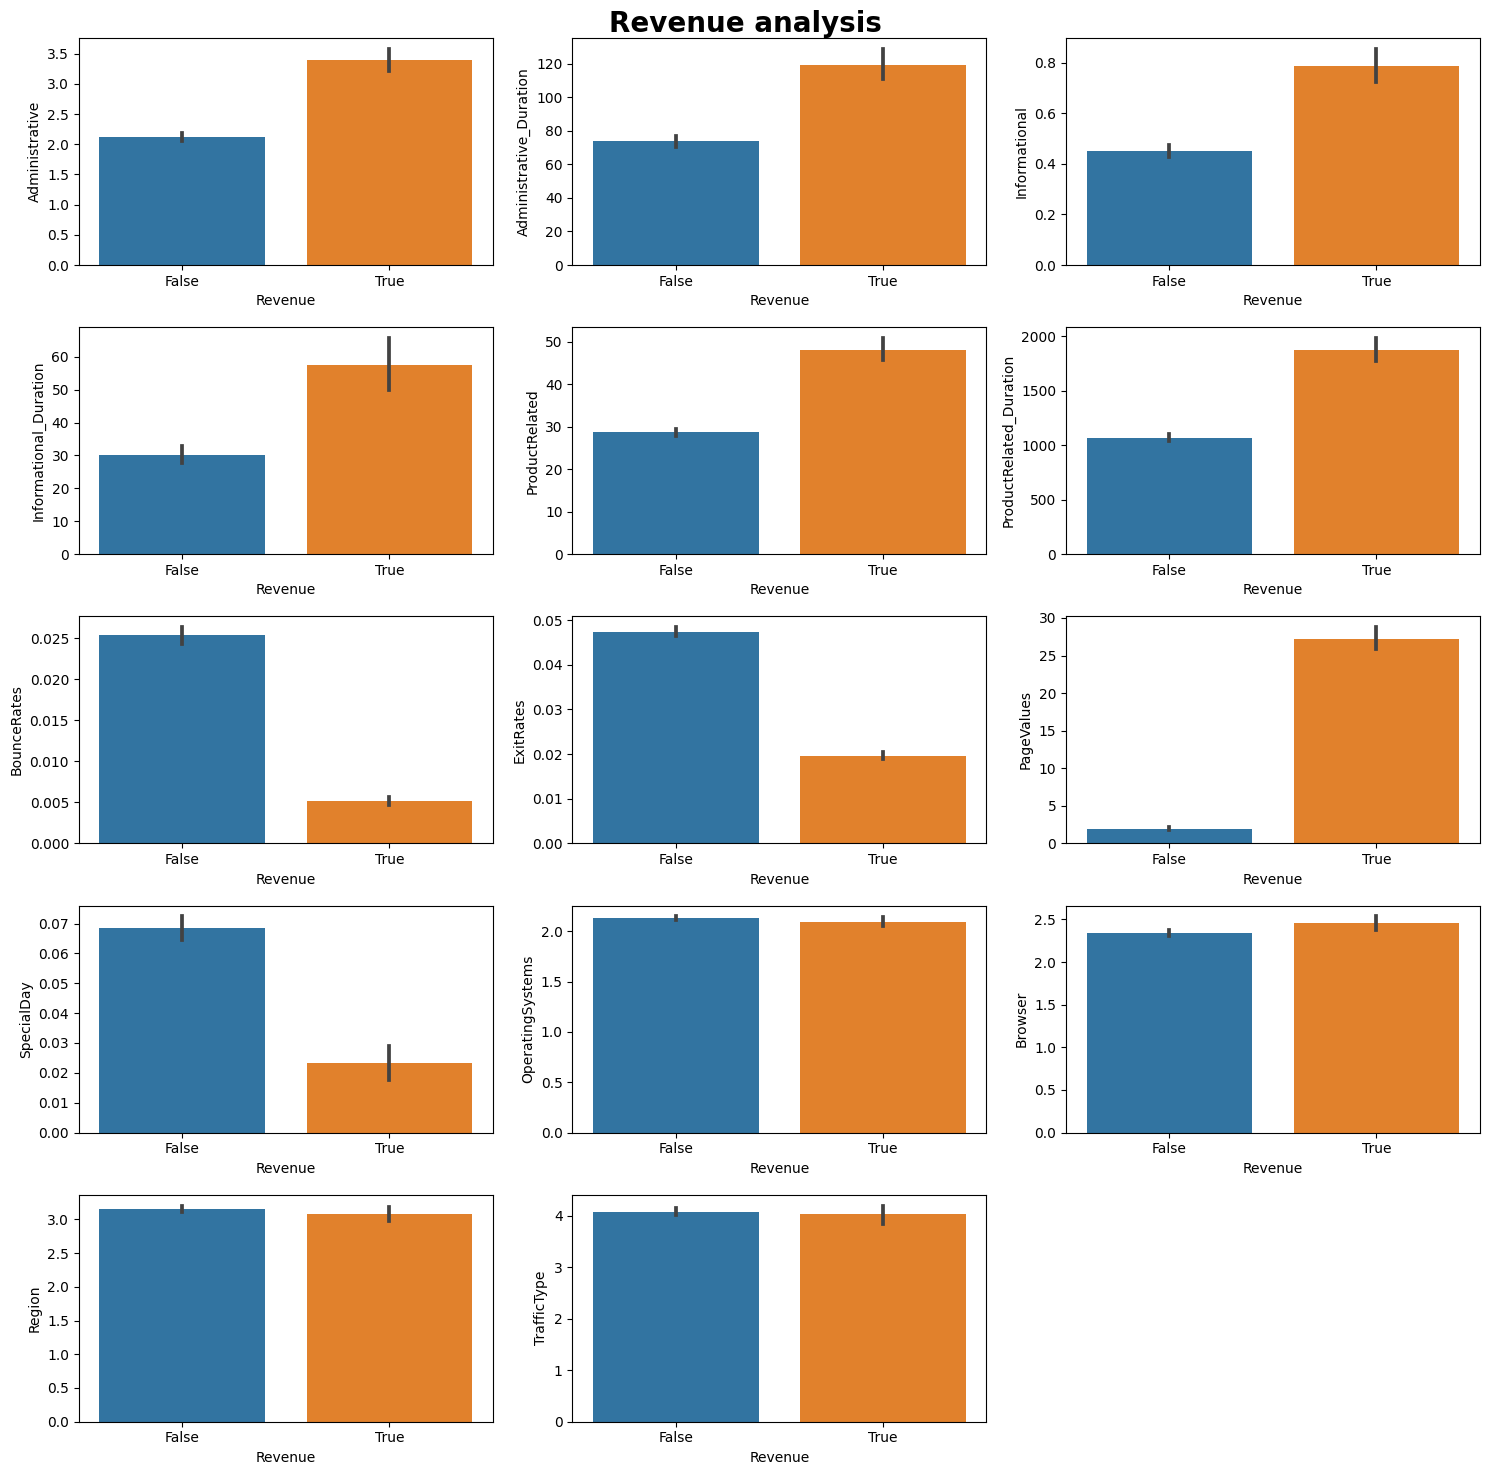

In [16]:
plt.figure(figsize=(15,15))
plt.suptitle('Revenue analysis', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(x='Revenue',y=df[num_col[i]], data = df)
    plt.tight_layout()

In [52]:
x = df.iloc[:, [5, 6]].values
x.shape

(12330, 2)

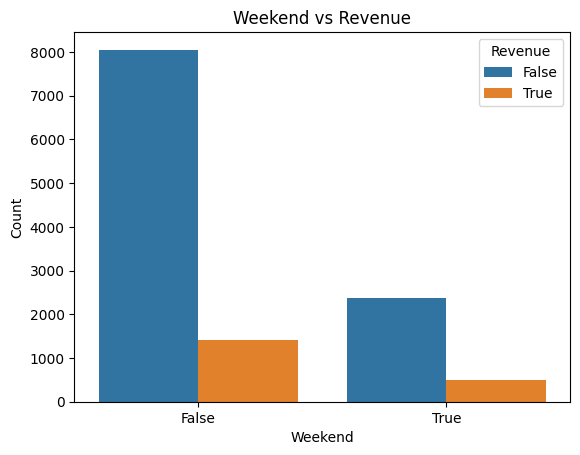

In [19]:
counts=df.groupby(['Weekend','Revenue']).size().reset_index(name='Count')

sns.barplot(x='Weekend',y='Count',hue='Revenue',data=counts)


# Add labels and title
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Weekend vs Revenue')

# Display the plot
plt.show()

In [20]:
# Label encoding of revenue  target feature
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
df['Revenue'] = label_en.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [21]:
# Splitting dependent and independent variables(columns)
y = df['Revenue']

X = df.drop(['Revenue'], axis = 1)

# checking the shapes of X,Y
print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 17)
Shape of y:  (12330,)


In [22]:
# Splitting of the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 1)

In [31]:
#Creating new variables for numerical attributes/columns
numeric_features = num_col
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['Month', 'VisitorType', 'Weekend']
# MAking pipeling for Encoding categorical features
#categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(transformers=[
                                                ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features),
                                            ])

In [36]:

# standard scale data
#Model Training
RFmod = Pipeline(steps=[('prepocessor', preprocessor), 
                     ('Random Forest Classifier', RandomForestClassifier())])
clf=RFmod.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#Model evaluation

# accuracy scores
accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
print("****************Random Forest ************************************")      
print("Accuracy:", accuracy)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
print("             ***************************               \n")  
                

****************Random Forest ************************************
Accuracy: 0.90714

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2115
           1       0.71      0.58      0.64       351

    accuracy                           0.91      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.90      0.91      0.90      2466

             ***************************               



In [40]:
#Model Training using AdaBoost
adboot=Pipeline(steps=[('preprocessor',preprocessor),('Ada Boost Classifier',AdaBoostClassifier())])

adboot.fit(X_train,y_train)

y_pred = adboot.predict(X_test)

#Model evaluation
# accuracy scores
accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
print("****************AdaBoost ************************************")      
print("Accuracy:", accuracy)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
print("             ***************************               \n")  


****************AdaBoost ************************************
Accuracy: 0.89335

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2115
           1       0.64      0.57      0.60       351

    accuracy                           0.89      2466
   macro avg       0.79      0.76      0.77      2466
weighted avg       0.89      0.89      0.89      2466

             ***************************               



In [44]:
#Model Training using XgBoost
adboot=Pipeline(steps=[('preprocessor',preprocessor),('XgBoost Classifier',XGBClassifier())])

adboot.fit(X_train,y_train)

y_pred = adboot.predict(X_test)

#Model evaluation
# accuracy scores
accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
print("****************XgBoost Classifier ************************************")      
print("Accuracy:", accuracy)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
print("             ***************************               \n")  



****************XgBoost Classifier ************************************
Accuracy: 0.90552

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2115
           1       0.70      0.60      0.64       351

    accuracy                           0.91      2466
   macro avg       0.82      0.78      0.79      2466
weighted avg       0.90      0.91      0.90      2466

             ***************************               



In [45]:
#Model Training using Gardient Boosting
gb = Pipeline(steps=[('prepocessor', preprocessor), ('Gradient Boosting Classifier', GradientBoostingClassifier())])
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

#Model evaluation
#Model evaluation
# accuracy scores
accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
print("****************GardientBoost Classifier ************************************")      
print("Accuracy:", accuracy)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
print("             ***************************               \n")  


****************GardientBoost Classifier ************************************
Accuracy: 0.90714

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2115
           1       0.71      0.60      0.65       351

    accuracy                           0.91      2466
   macro avg       0.82      0.78      0.80      2466
weighted avg       0.90      0.91      0.90      2466

             ***************************               



### All Algorithm except Adaboost are showing Accurcay of 0.90